In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
food_consumption = pd.read_csv("food_consumption.csv")

In [3]:
be_consumption = food_consumption[food_consumption["country"] == "Belgium"]
usa_consumption = food_consumption[food_consumption["country"] == "USA"]

In [4]:
be_consumption['consumption'].agg([np.mean, np.median])

mean      42.132727
median    12.590000
Name: consumption, dtype: float64

In [5]:
usa_consumption['consumption'].agg([np.mean, np.median])

mean      44.65
median    14.58
Name: consumption, dtype: float64

In [6]:
subset_data = food_consumption[(food_consumption['country'] == 'Belgium') | (food_consumption['country'] == 'USA')]
grouped_data = subset_data.groupby('country')['consumption']
result = grouped_data.agg(['mean', 'median'])
print(result)


              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


# MEAN VS MEDIAN

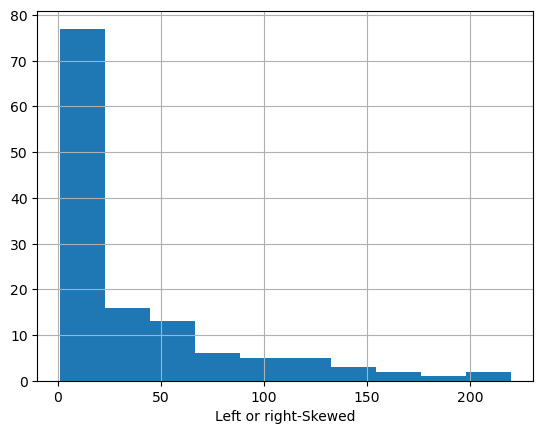

In [7]:
rice_consumption = food_consumption[food_consumption["food_category"] == "rice"]
plt.hist(rice_consumption['co2_emission'])
plt.xlabel('Left or right-Skewed')
plt.grid(True)
plt.show()

In [8]:
rice_consumption['co2_emission'].agg([np.mean, np.median])

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64

# Calculate the quartiles , quintiles, deciles of co2_emission 

In [9]:
print(np.quantile(food_consumption['co2_emission'],[0,0.25,0.5,0.75,1]))

[   0.        5.21     16.53     62.5975 1712.    ]


In [10]:
print(np.quantile(food_consumption['co2_emission'],(0,0.2,0.4,0.6,0.8,1)))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


In [11]:
print(np.quantile(food_consumption['co2_emission'],(0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)))


[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


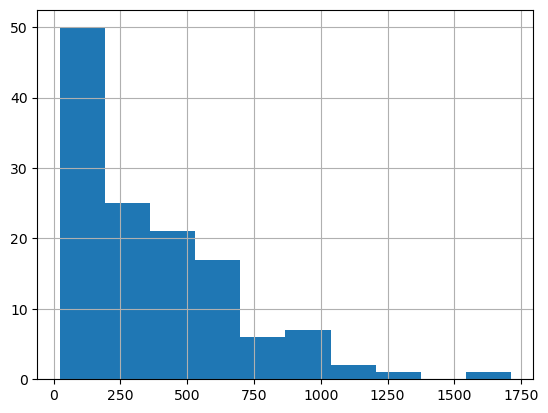

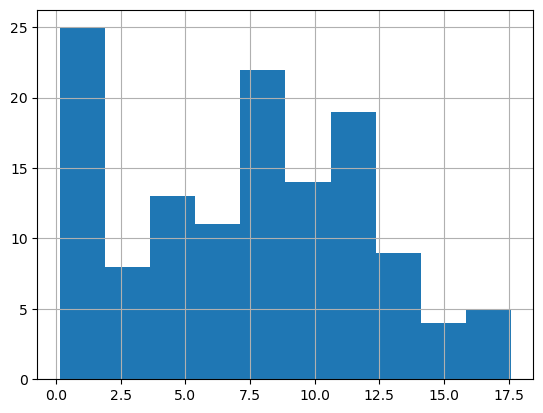

In [12]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))
# Create histogram of co2_emission for food_category 'beef' 
food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'].hist() # Show plot
plt.show()
# Create histogram of co2_emission for food_category 'eggs' 
food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'].hist()
plt.show()

In [13]:
# Calculate total co2_emission per country: emissions_by_country 
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()
# Compute the first and third quantiles and IQR of emissions_by_country 
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1
# Calculate the lower and upper cutoffs for outliers 
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)] 
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


# CACULATING PROBABILITIES

In [14]:
amir_deals = pd.read_csv('amir_deals.csv')
# Count the deals for each product
counts = amir_deals['product'].value_counts()
# Calculate probability of picking a deal with each product 
probs = counts / amir_deals.shape[0]
print(probs)

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


# SAMPLING DEALS

In [15]:
# Sample 5 deals without replacement 
sample_without_replacement = amir_deals.sample(5) 
print(sample_without_replacement)
# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True) 
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
177         178  Product D      New   Lost  7320.05         72
167         168  Product B  Current    Won  4965.08          9
69           70  Product J      New   Lost  3182.09          2
112         113  Product D  Current    Won  3727.65         12
59           60  Product E  Current   Lost  6407.69          6
     Unnamed: 0    product   client status   amount  num_users
87           88  Product C  Current    Won  3579.63          3
120         121  Product D  Current   Lost  8180.81         96
2             3  Product B      New    Won  5738.09         87
57           58  Product C  Current   Lost  5411.26         17
125         126  Product C  Current    Won  4796.13         44


# Creating a probablity distribution


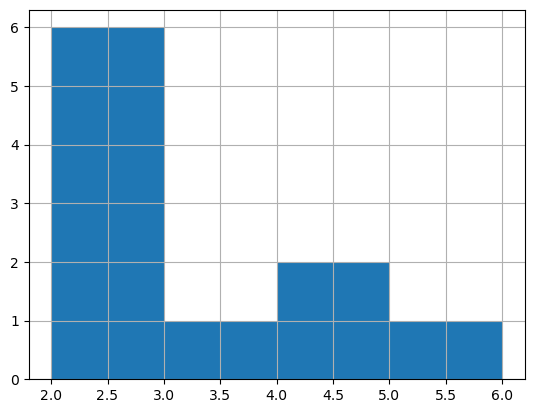

   group_size  prob
0           2   0.6
1           4   0.2
2           6   0.1
3           3   0.1
The expected value is 2.9000000000000004
The probability is  0.30000000000000004


In [16]:
restaurant_groups = pd.read_csv('restaurant_groups.csv') 
restaurant_groups['group_size'].hist(bins=[2,3,4,5,6]) 
plt.show()
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob'] 
print(size_dist)
# Expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob']) 
print('The expected value is', expected_value)
# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]
# Sum the probabilities of groups_4_or_more 
prob_4_or_more = np.sum(groups_4_or_more['prob']) 
print('The probability is ',prob_4_or_more)

# PRACTICE - DATA BACKUPS

In [17]:
min_time = 0 
max_time = 30
# Import uniform from scipy.stats 
from scipy.stats import uniform
# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1-uniform.cdf(5,0,30) 
print(prob_greater_than_5)
# Calculate probability of waiting 10-20 mins 
prob_between_10_and_20 = uniform.cdf(20,0,30)-uniform.cdf(10,0,30) 
print(prob_between_10_and_20)

0.8333333333333334
0.3333333333333333


# Simulating wait times

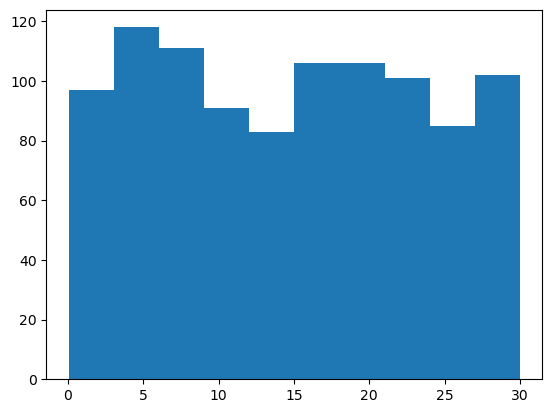

In [18]:
# Set random seed to 334 
np.random.seed(334)
# Import uniform
from scipy.stats import uniform
# Generate 1000 wait times between 0 and 30 mins 
wait_times = uniform.rvs(0, 30, size=1000)
# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

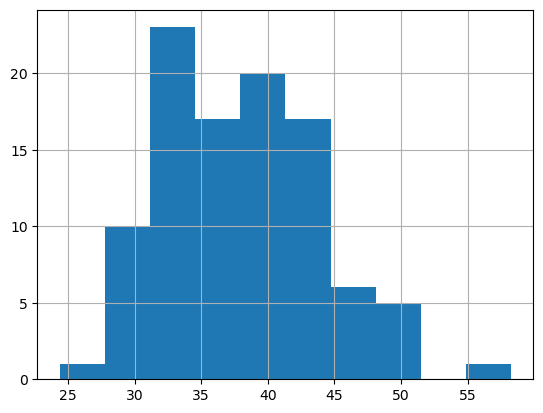

In [19]:
# Set seed to 104 
np.random.seed(104)
sample_means = [] # Loop 100 times 
for i in range(100):
    # Take sample of 20 num_users
    samp_20 = amir_deals['num_users'].sample(20, replace=True) 
    # Calculate mean of samp_20
    samp_20_mean = np.mean(samp_20)
    # Append samp_20_mean to sample_means 
    sample_means.append(samp_20_mean)
# Convert to Series and plot histogram 
sample_means_series = pd.Series(sample_means) 
sample_means_series.hist()
# Show plot
plt.show()

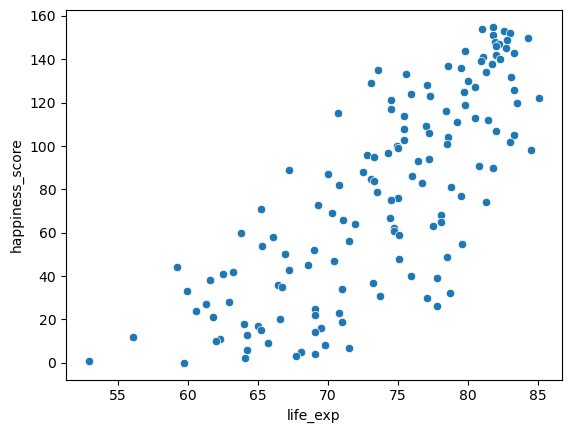

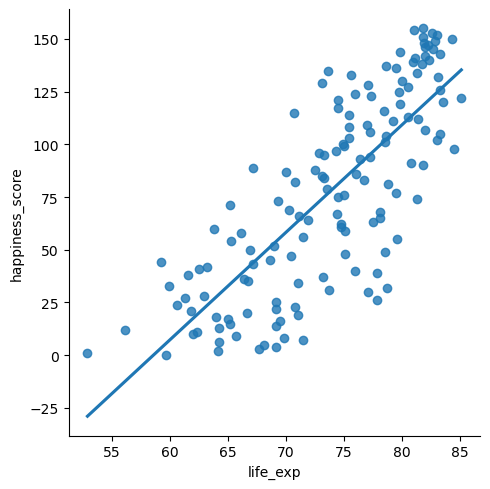

0.7802249053272062


In [26]:
world_happiness = pd.read_csv('world_happiness.csv')
sns.scatterplot(x='life_exp', y='happiness_score', data=world_happiness)
plt.show()
sns.lmplot(x='life_exp', y='happiness_score', data=world_happiness, ci=None)
plt.show()
cor = world_happiness['life_exp'].corr(world_happiness['happiness_score']) 
print(cor)

Correlation between GDP per Capita and Happiness Score: 0.73


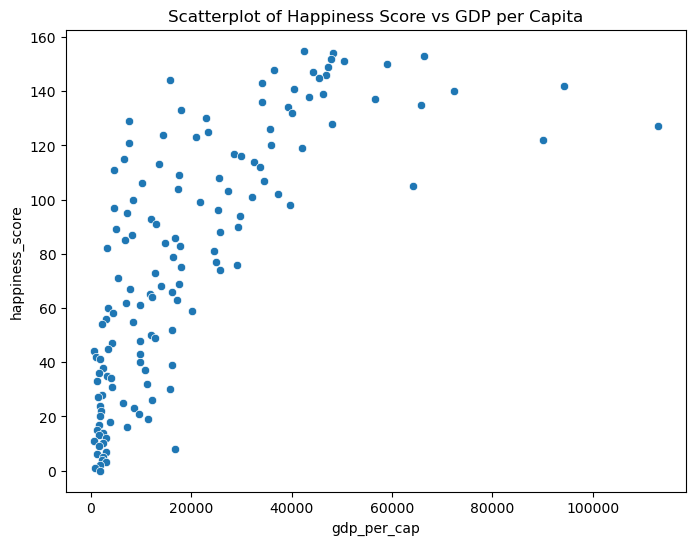

In [27]:
# Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=world_happiness, x='gdp_per_cap', y='happiness_score')
plt.title("Scatterplot of Happiness Score vs GDP per Capita")

# Calculate correlation
correlation = world_happiness['gdp_per_cap'].corr(world_happiness['happiness_score'])
print(f"Correlation between GDP per Capita and Happiness Score: {correlation:.2f}")
plt.show()


In [28]:
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])


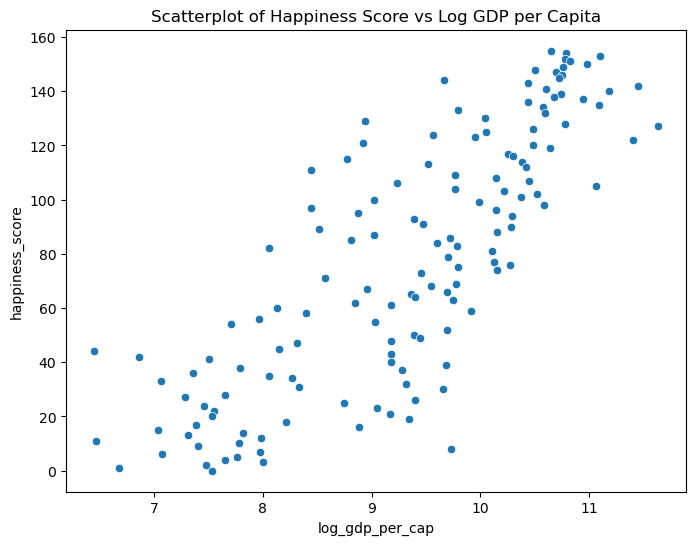

In [29]:
# Scatterplot with log_gdp_per_cap
plt.figure(figsize=(8, 6))
sns.scatterplot(data=world_happiness, x='log_gdp_per_cap', y='happiness_score')
plt.title("Scatterplot of Happiness Score vs Log GDP per Capita")
plt.show()


In [30]:
# Calculate correlation
correlation_log = world_happiness['log_gdp_per_cap'].corr(world_happiness['happiness_score'])
print(f"Correlation between Log GDP per Capita and Happiness Score: {correlation_log:.2f}")


Correlation between Log GDP per Capita and Happiness Score: 0.80
